<a href="https://colab.research.google.com/github/duyhieufpt123/DA-BISEM2/blob/main/Bu%E1%BB%95i_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
##Import all the needed modules
from google.colab import files
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Import altair as alt
from datetime import datetime


In [26]:
df = pd.read_csv(r'Uber Request Data.csv')

In [27]:
df.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


Chúng ta cần làm những việc sau đây:
- Đổi định dạng Request timestamp và Drop timestamp về chung 1 dạng

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [29]:
# Lọc dữ liệu bị null
df_filtered = df[df['Driver id'].isnull()]

# Xuất ra 10 dòng đầu tiên
print(df_filtered.head(10))


      Request id Pickup point  Driver id             Status Request timestamp  \
4095        1362         City        NaN  No Cars Available    11/7/2016 0:02   
4096        1364         City        NaN  No Cars Available    11/7/2016 0:06   
4097        1366         City        NaN  No Cars Available    11/7/2016 0:09   
4098           2      Airport        NaN  No Cars Available    11/7/2016 0:23   
4099           7      Airport        NaN  No Cars Available    11/7/2016 0:30   
4100           6         City        NaN  No Cars Available    11/7/2016 0:36   
4101           4         City        NaN  No Cars Available    11/7/2016 0:37   
4102           8         City        NaN  No Cars Available    11/7/2016 0:40   
4103          12         City        NaN  No Cars Available    11/7/2016 1:08   
4104          16      Airport        NaN  No Cars Available    11/7/2016 1:09   

     Drop timestamp  
4095            NaN  
4096            NaN  
4097            NaN  
4098            NaN 

In [44]:
#Đổi dữ liệu Request timestamp và Drop timestamp về 1 kiểu chuẩn
def convert_time(x):
    x = str(x)
    if len(x) in [15.0, 14.0]:
        x = datetime.strptime(x, "%d/%m/%Y %H:%M")
    elif len(x) in [19.0]:
        x = datetime.strptime(x, "%d-%m-%Y %H:%M:%S")
    else:
        x = None
        x = pd.to_datetime(x)
    return x

In [45]:
#Ép kiểu convert_time vào 2 cột đã được xác định:
df["Drop timestamp"] = df["Drop timestamp"].apply(convert_time)
df['Request timestamp'] = df['Request timestamp'].apply(convert_time)

- Gọi tên cho df

In [49]:
df_ = df

In [54]:
#Đây là bước model data (làm giàu data)
#Đối với cột Request Timestamp:
#Trích xuất dữ liệu yêu cầu sang date
df_['Request date'] = df_['Request timestamp'].dt.date

#Trích xuất dữ liệu day of week theo yêu cầu sang full day name
df_['Request day'] = df_['Request timestamp'].dt.day_name()

#Trích xuất hour từ timestamp
df_['Request hour'] = df_['Request timestamp'].dt.hour

#Đối với cột Drop timestamp
#Trích xuất Drop timestamp
df_['Drop date'] = df_['Drop timestamp'].dt.date

#Trích xuất dữ liệu day of week theo yêu cầu sang full day name
df_['Drop day'] = df_['Drop timestamp'].dt.day_name()

#Trích xuất hour từ timestamp
df_['Drop hour'] = df_['Drop timestamp'].dt.hour
#Thêm thời lượng (Khoảng thời gian):
df_['Duration'] = (df_['Drop timestamp'] - df['Request timestamp']).dt.total_seconds()/60


In [55]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request date,Request day,Request hour,Drop date,Drop day,Drop hour,Duration
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,Monday,11,2016-07-11,Monday,13.0,69.000000
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,Monday,17,2016-07-11,Monday,18.0,50.000000
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,Tuesday,9,2016-07-12,Tuesday,9.0,41.000000
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,Tuesday,21,2016-07-12,Tuesday,22.0,55.000000
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,Wednesday,8,2016-07-13,Wednesday,9.0,52.516667


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
 6   Request date       6745 non-null   object        
 7   Request day        6745 non-null   object        
 8   Request hour       6745 non-null   int64         
 9   Drop date          2831 non-null   object        
 10  Drop day           2831 non-null   object        
 11  Drop hour          2831 non-null   float64       
 12  Duration           2831 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(6)
memory us

In [62]:
#Đếm số cuốc xe:
distinct_request_count = df_['Request id'].nunique()
print('Số cuốc xe: ', distinct_request_count)
#Đếm số tài xế:
distinct_driver_count = df_['Driver id'].nunique()
print('Số tài xế: ', distinct_driver_count)
#Đếm tỷ lệ hủy cuốc:
cancel_count = df[df['Status'] == 'Cancelled' ]['Status'].count()
total_count = df['Status'].count()
cancel_rate = cancel_count/total_count
print('Tỷ lệ hủy cuốc: ', cancel_rate)

Số cuốc xe:  6745
Số tài xế:  300
Tỷ lệ hủy cuốc:  0.18739807264640473


In [65]:
# Tính số lượng cuốc xe cho mỗi trạng thái
status_counts = df['Status'].value_counts()
status_counts

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

In [66]:
# Tạo một danh sách các giá trị và tỷ lệ phần trăm cho mỗi trạng thái
status_values = status_counts.index
status_percentages = status_counts / df.shape[0] * 100

status_values
status_percentages

Trip Completed       41.971831
No Cars Available    39.288362
Cancelled            18.739807
Name: Status, dtype: float64

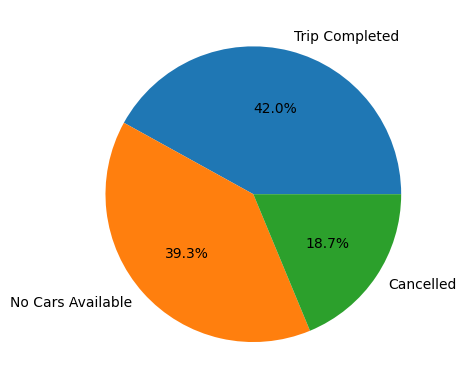

In [67]:
# Vẽ pie chart
plt.pie(status_percentages, labels=status_values, autopct='%1.1f%%')
plt.show()

In [70]:
pivot_table = df_.pivot_table(index = 'Pickup point', columns ='Status', aggfunc = 'size', fill_value=0)

In [71]:
pivot_table.head()

Status,Cancelled,No Cars Available,Trip Completed
Pickup point,,,
Airport,198,1713,1327
City,1066,937,1504


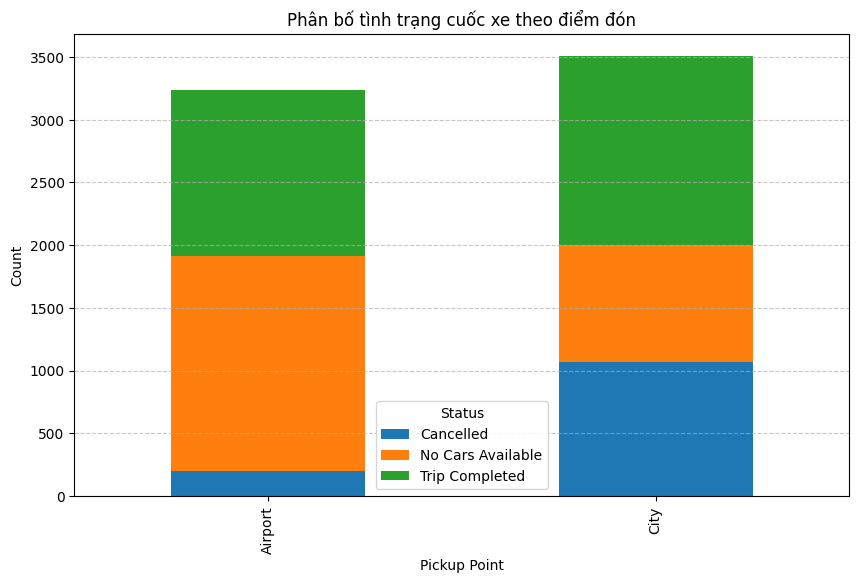

In [74]:
#Tạo 1 biểu đồ stacked bar
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(10,6))

#Gán tên các trục và tiêu đề
plt.xlabel('Địa điểm đón')
plt.ylabel('Số lượng')
plt.title('Phân bố tình trạng cuốc xe theo điểm đón')

#Show the legend
plt.legend(title = 'Trạng thái')
ax.grid(True, axis='y', linestyle='--',alpha=0.7)

#Show the plot
plt.show()


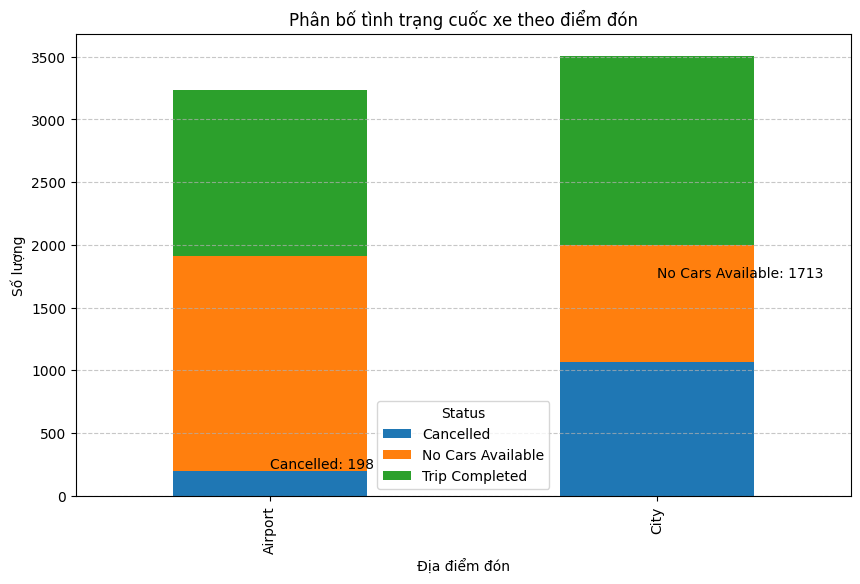

In [77]:
#Tạo 1 biểu đồ stacked bar
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(10,6))

#Gán tên các trục và tiêu đề
plt.xlabel('Địa điểm đón')
plt.ylabel('Số lượng')
plt.title('Phân bố tình trạng cuốc xe theo điểm đón')

#Show the legend
plt.legend(title = 'Trạng thái')
ax.grid(True, axis='y', linestyle='--',alpha=0.7)

#Thêm ghi chú
for i in range(len(pivot_table.columns)):
  plt.annotate(pivot_table.columns[i] + ": " + str(pivot_table.iloc[0, i]), (i, pivot_table.iloc[0, i]), ha='left', va='bottom' )

#Show the plot
plt.show()


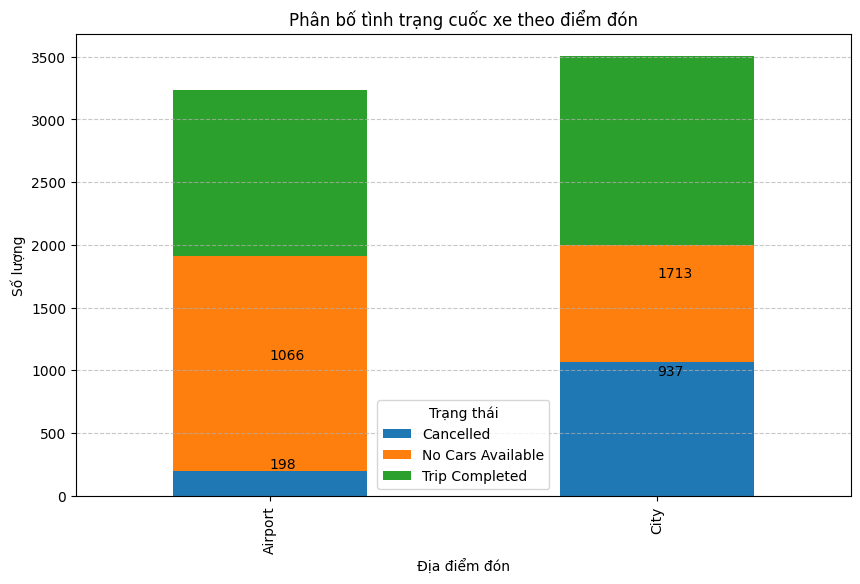

In [79]:
pivot_table = df_.pivot_table(index = 'Pickup point', columns='Status', aggfunc='size', fill_value=0)
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(10,6))

#Gán tên các trục và tiêu đề
plt.xlabel('Địa điểm đón')
plt.ylabel('Số lượng')
plt.title('Phân bố tình trạng cuốc xe theo điểm đón')

#Show the legend
plt.legend(title = 'Trạng thái')
ax.grid(True, axis='y', linestyle='--',alpha=0.7)

#Thêm ghi chú
for i in range(len(pivot_table.columns)):
  for j in range(len(pivot_table)):
    plt.annotate(str(pivot_table.iloc[j, i]), (i, pivot_table.iloc[j, i]), ha='left', va='bottom')
#Show biểu đồ
plt.show()